In [1]:
import tensorflow as tf
import numpy
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

train_generator = train_datagen.flow_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Potatoes/dataset/train",
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size  = BATCH_SIZE, 
    class_mode = "sparse"
    
)

Found 6813 images belonging to 4 classes.


In [3]:
train_generator.class_indices

{'Potato Early Blight': 0,
 'Potato Healthy': 1,
 'Potato Infestans': 2,
 'Potato Late Blight': 3}

In [4]:
train_class_names = list(train_generator.class_indices.keys())
train_class_names

['Potato Early Blight',
 'Potato Healthy',
 'Potato Infestans',
 'Potato Late Blight']

 This command is used to save and see the new augmented images during the training process
 
 save_to_dir = "C:/Users/q/Downloads/All_Data/Images_train_test/Potatoes/dataset/AugmentedImages"

for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

In [5]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

validation_generator = validation_datagen.flow_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Potatoes/dataset/val",
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size  = BATCH_SIZE, 
    class_mode = "sparse"    
)

Found 972 images belonging to 4 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

test_generator = test_datagen.flow_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Potatoes/dataset/test",
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size  = BATCH_SIZE, 
    class_mode = "sparse"    
)

Found 1949 images belonging to 4 classes.


In [7]:
test_class_names = list(test_generator.class_indices.keys())
test_class_names

['Potato Early Blight',
 'Potato Healthy',
 'Potato Infestans',
 'Potato Late Blight']

In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model_potato= models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_potato.build(input_shape=input_shape)

In [9]:
model_potato.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
972/32

30.375

In [11]:
history = model_potato.fit(
    train_generator,
    steps_per_epoch = 212, #The amount of image divided by the batch size
    batch_size = BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = 30,
    verbose  = 1,
    epochs = 2
)

Epoch 1/2
212/212 [==============================] - 110s 492ms/step - loss: 1.0815 - accuracy: 0.4712 - val_loss: 0.8942 - val_accuracy: 0.5760
Epoch 2/2
212/212 [==============================] - 97s 455ms/step - loss: 0.6869 - accuracy: 0.6537 - val_loss: 0.5335 - val_accuracy: 0.7115


In [12]:
scores = model_potato.evaluate(test_generator)

61/61 [==============================] - 24s 395ms/step - loss: 0.5204 - accuracy: 0.7075


In [13]:
scores

[0.5204450488090515, 0.7075423002243042]

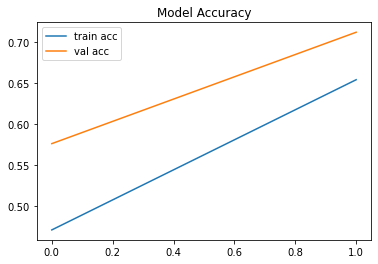

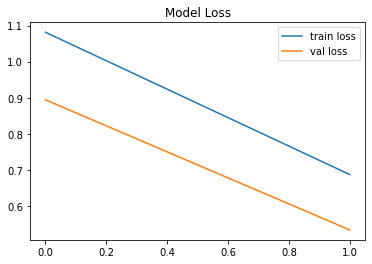

In [14]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend()
plt.show()

first image to predict
actual label: Potato Late Blight
predicted label: Potato Late Blight


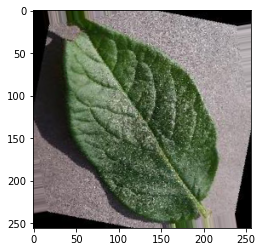

In [27]:
#Run prediction on a sample image
for image_batch, test_labels_batch in test_generator:
    
    first_image = image_batch[0]
    first_label = int(test_labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",train_class_names[first_label])
    
    batch_prediction = model_potato.predict(image_batch)
    print("predicted label:",test_class_names[np.argmax(batch_prediction[0])])
    
    break

In [16]:
#This is our Confusion Matrix for the potato model

In [17]:
# import libraries
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.utils.multiclass import unique_labels
import time
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.callbacks import TensorBoard

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_generator:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model_potato.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
confusion_matrix(predicted_labels, correct_labels)

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/max_pooling2d/MaxPool' defined at (most recent call last):
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 357, in dispatch_shell
      await result
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\q\AppData\Local\Temp\ipykernel_10460\2813888128.py", line 11, in <module>
      batch_prediction = model_potato.predict(image_batch)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\q\anaconda3\envs\tf-gpu\lib\site-packages\keras\layers\pooling.py", line 357, in call
      outputs = self.pool_function(
Node: 'sequential/max_pooling2d/MaxPool'
OOM when allocating tensor with shape[32,32,127,127] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/max_pooling2d/MaxPool}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_3727]

In [23]:
from sklearn.metrics import classification_report
y_true = correct_labels
y_pred = predicted_labels
target_names = train_class_names
print(classification_report(y_true, y_pred, target_names=target_names))

NameError: name 'correct_labels' is not defined

In [49]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          text_size=14,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(11,11))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    size=text_size,
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax

In [50]:
plot_confusion_matrix(correct_labels, predicted_labels, train_class_names, title="Confusion Matrix")

NameError: name 'correct_labels' is not defined

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [3]:
#import data into tensorflow dataset object
training_set=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Potatoes/train",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)



Found 8952 files belonging to 4 classes.


In [4]:
train_class_names = training_set.class_names
train_class_names

['Potato Early Blight',
 'Potato Healthy',
 'Potato Infestans',
 'Potato Late Blight']

In [5]:
len(training_set)

280

(256, 256, 3)


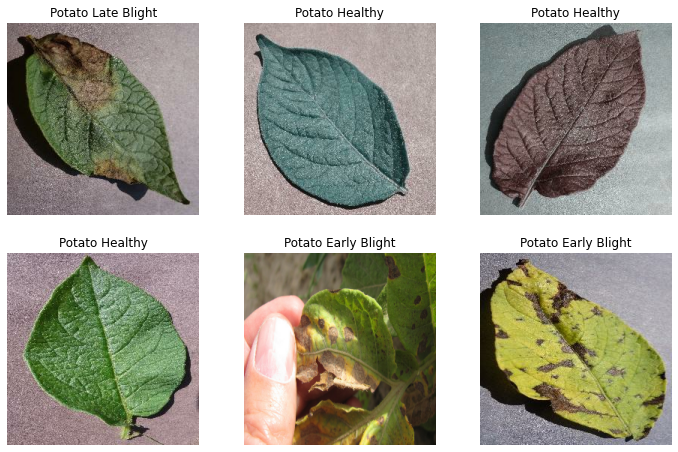

In [6]:
#let's now try to visualize our images with their label
plt.figure(figsize=(12,12))
for image_batch, label_batch in training_set.take(1):
    for i in range(6):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(train_class_names[label_batch[i]])
        #plt.title(label_batch[i].numpy())
        
        
    print(image_batch[0].shape)

In [7]:
#let's writre a function dto split our data automatically
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1,val_split = 0.1, shuffle =True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 1200)
        
    train_size = int(train_split*ds_size)
    val_size = int(ds_size*val_split)
    
    train_data = ds.take(train_size)
    val_data = ds.skip(train_size).take(val_size)
    test_data = ds.skip(train_size).skip(val_size)
    return train_data, test_data, val_data 

In [8]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(training_set)
len(train_ds), len(test_ds), len(val_ds)

(224, 28, 28)

In [9]:
#This is made to optimize the moderl performance so that tthe model trains better because of the pipeline stuff...
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
#Now let's scale our images AKA data normalization
#And also the resize layer will take care of resizing the images submitted the model during training even if they are not of size 256x256
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [11]:
#Here we will perform the data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model_potato= models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
  
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_potato.build(input_shape=input_shape)

In [13]:
model_potato.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model_potato.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS,
)

Epoch 1/30
224/224 [==============================] - 138s 525ms/step - loss: 1.0532 - accuracy: 0.4944 - val_loss: 0.6119 - val_accuracy: 0.6964
Epoch 2/30
224/224 [==============================] - 53s 234ms/step - loss: 0.5340 - accuracy: 0.7338 - val_loss: 0.4794 - val_accuracy: 0.7355
Epoch 3/30
224/224 [==============================] - 30s 133ms/step - loss: 0.4397 - accuracy: 0.7746 - val_loss: 0.4385 - val_accuracy: 0.7846
Epoch 4/30
224/224 [==============================] - 30s 133ms/step - loss: 0.4058 - accuracy: 0.7872 - val_loss: 0.3878 - val_accuracy: 0.7991
Epoch 5/30
224/224 [==============================] - 30s 133ms/step - loss: 0.3934 - accuracy: 0.7945 - val_loss: 0.3651 - val_accuracy: 0.7879
Epoch 6/30
224/224 [==============================] - 30s 133ms/step - loss: 0.3560 - accuracy: 0.8043 - val_loss: 0.3738 - val_accuracy: 0.8192
Epoch 7/30
224/224 [==============================] - 30s 133ms/step - loss: 0.3343 - accuracy: 0.8225 - val_loss: 0.3196 - val_a

In [15]:
#import data into tensorflow dataset object
test_set=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/q/Downloads/All_Data/Images_train_test/Potatoes/test",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 847 files belonging to 4 classes.


In [16]:
test_class_names = test_set.class_names
test_class_names

['Potato Early Blight',
 'Potato Healthy',
 'Potato Infestans',
 'Potato Late Blight']

first image to predict
actual label: Potato Early Blight
predicted label: Potato Early Blight


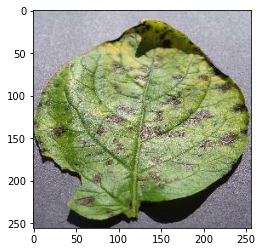

In [17]:
#Run prediction on a sample image
for images_batch, test_labels_batch in test_set.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = test_labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",train_class_names[first_label])
    
    batch_prediction = model_potato.predict(images_batch)
    print("predicted label:",test_class_names[np.argmax(batch_prediction[0])])

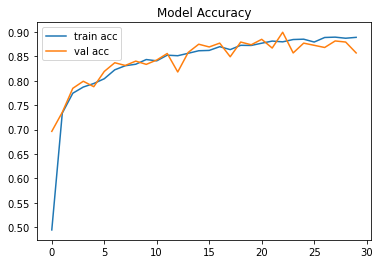

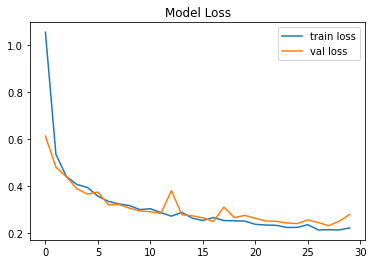

In [18]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()
,
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model_potato.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
confusion_matrix(predicted_labels, correct_labels)

array([[213,   0,   2,   3],
       [  0, 216,   4,   3],
       [  0,   0, 173,  62],
       [  0,   0,  49, 171]], dtype=int64)

In [32]:
train_class_names

['Potato Early Blight',
 'Potato Healthy',
 'Potato Infestans',
 'Potato Late Blight']

In [33]:
from sklearn.metrics import classification_report
y_true = correct_labels
y_pred = predicted_labels
target_names = train_class_names
print(classification_report(y_true, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Potato Early Blight       0.98      1.00      0.99       213
     Potato Healthy       0.97      1.00      0.98       216
   Potato Infestans       0.74      0.76      0.75       228
 Potato Late Blight       0.78      0.72      0.75       239

           accuracy                           0.86       896
          macro avg       0.86      0.87      0.87       896
       weighted avg       0.86      0.86      0.86       896



In [34]:
#The Model eveluation we'll be used to check if the obtained accuracies are the same in both the matrix and the evaluation
model_potato.evaluate(test_ds)

28/28 [==============================] - 2s 52ms/step - loss: 0.2603 - accuracy: 0.8627


[0.26030340790748596, 0.8627232313156128]

In [35]:
#This is our Confusion Matrix for the potato model

In [36]:
# import libraries
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.utils.multiclass import unique_labels
import time
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.callbacks import TensorBoard

In [37]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          text_size=14,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(11,11))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    size=text_size,
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

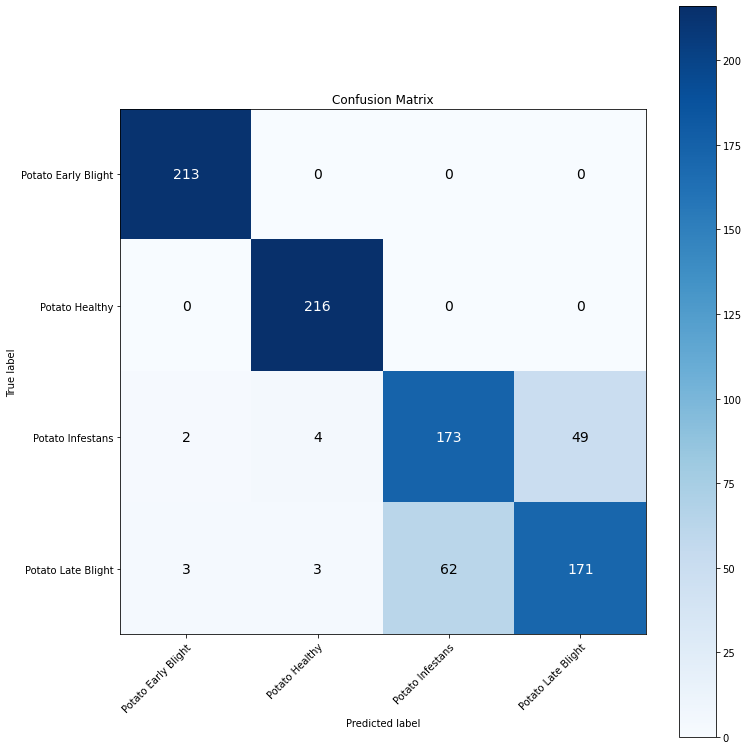

In [38]:
plot_confusion_matrix(correct_labels, predicted_labels, train_class_names, title="Confusion Matrix")

In [39]:
model_potato.save("C:/Users/q/Downloads/All_Data/saved_models/Potato_New.h5")

In [40]:
model_test = models.load_model('C:/Users/q/Downloads/All_Data/saved_models/Potato_New.h5')

In [41]:
model_test.evaluate(test_ds)

28/28 [==============================] - 2s 52ms/step - loss: 0.2603 - accuracy: 0.8627


[0.26030340790748596, 0.8627232313156128]

first image to predict
actual label: Potato Healthy
predicted label: Potato Healthy


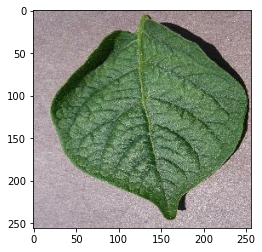

In [61]:
#Run prediction on a sample image
for images_batch, test_labels_batch in test_set.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = test_labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",train_class_names[first_label])
    
    batch_prediction = model_test.predict(images_batch)
    print("predicted label:",test_class_names[np.argmax(batch_prediction[0])])